# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 


# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    OpenMM (https://openmm.org/)
2.    PyTraj (https://amber-md.github.io/pytraj/latest/index.html)
4.    Numpy (https://numpy.org/)
5.    Matplotlib (https://matplotlib.org/)
8.    AmberTools (https://ambermd.org/AmberTools.php)

Load libraries in conda enviroment:

conda install -c conda-forge openmm 

conda install -c conda-forge jupyterlab

conda install -c conda-forge mdtraj




In [1]:
import numpy as np
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
import openmm as mm
from openmm import app
from openmm import unit
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import pandas as pd
from statistics import mean, stdev
from matplotlib import colors
import mdtraj as md
import seaborn as sns


In [4]:
workdir="./Exercise0/"
datadir='./Exercise0/data/'
outdir='./Exercise0/outdir/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

./Exercise0/data/butane.pdb
./Exercise0/data/butane.gaff2.xml


In [5]:
# print('Minimizing...')

# st = simulation.context.getState(getPositions=True,getEnergy=True)
# print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

# simulation.minimizeEnergy(maxIterations=100)

# st = simulation.context.getState(getPositions=True,getEnergy=True)
# print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

In [6]:
# from sys import stdout

# print('Equilibrating...')

# simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
#     potentialEnergy=True, temperature=True, separator=','))
# simulation.context.setVelocitiesToTemperature(150.0*kelvin)
# simulation.step(2500)

In [7]:
# os.path.join(workdir, "butane_sim.dcd")

In [8]:
# import time as time

# print('Running Production...')

# # Begin timer
# tinit=time.time()

# # Clear simulation reporters
# simulation.reporters.clear()

# # Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# # output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
# simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
#     step=True, time=True, potentialEnergy=True, temperature=True, 
#     speed=True, separator=','))

# # write out a trajectory (i.e., coordinates vs. time) to a DCD
# # file every 100 steps - 0.2 ps
# simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim.xtc"),100))
                
# # run the simulation for 1.0x10^7 steps - 20 ns
# simulation.step(10000000)

# # End timer
# tfinal=time.time()
# print('Done!')
# print('Time required for simulation:', tfinal-tinit, 'seconds')

In [9]:
import mdtraj as md
traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
traj


<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x1065bdee0>

In [10]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

In [11]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x17f18d400>

In [12]:
C_sel=top.select("type C")
print(C_sel)
top.atom(10)
for atom in C_sel:
    print(atom,top.atom(atom))

H_sel=top.select("type H")
for atom in H_sel:
    print(atom,top.atom(atom))

[ 0  4  7 10]
0 NBU1-C1
4 NBU1-C2
7 NBU1-C3
10 NBU1-C4
1 NBU1-H11
2 NBU1-H12
3 NBU1-H13
5 NBU1-H21
6 NBU1-H22
8 NBU1-H31
9 NBU1-H32
11 NBU1-H41
12 NBU1-H42
13 NBU1-H43


In [13]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


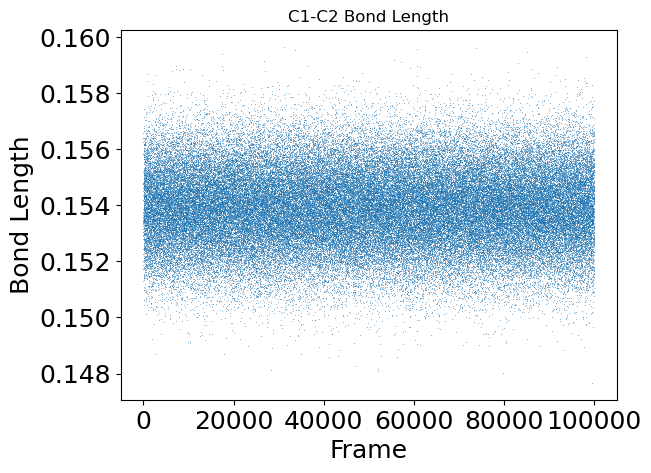

In [14]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C1C2bondlength,linewidth=1)
plt.plot(C1C2bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
#plt.xlim([0,1000])

plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

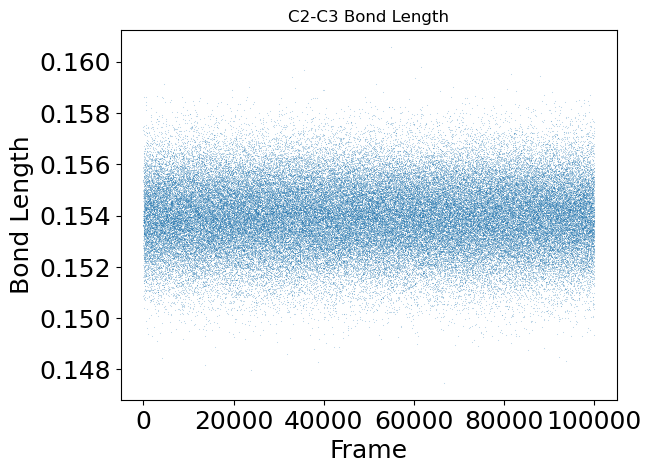

In [15]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C2C3bondlength)
plt.plot(C2C3bondlength,linewidth=0,marker='x',markersize=.05)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

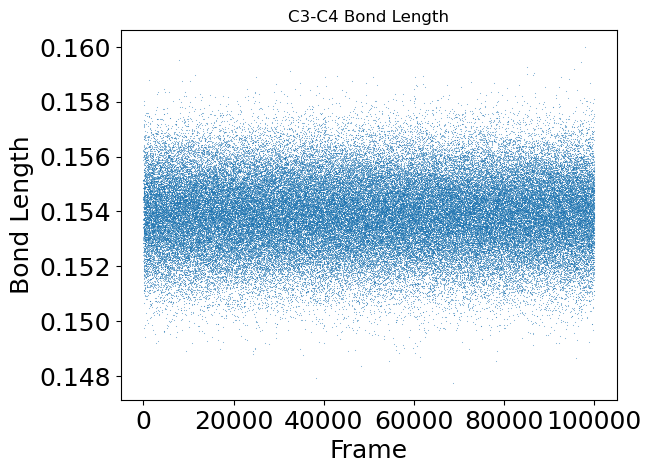

In [16]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C3C4bondlength)
plt.plot(C3C4bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

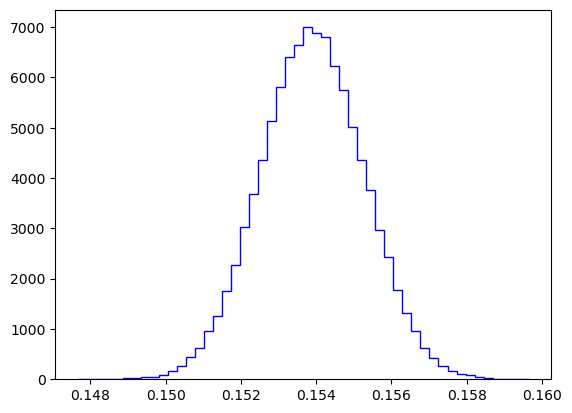

In [17]:
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.show()

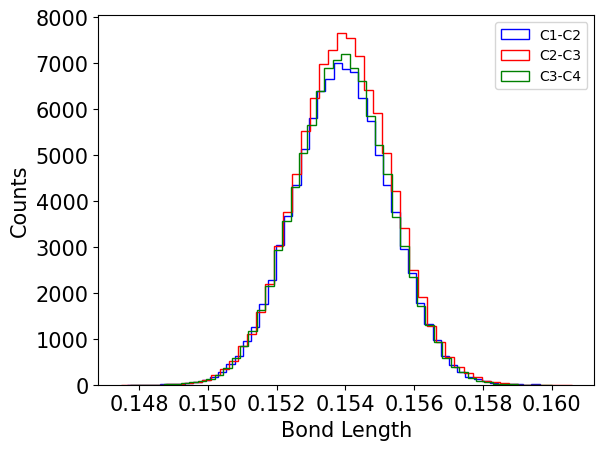

In [18]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

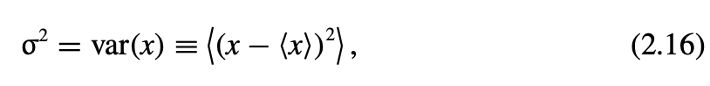

In [19]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######

In [20]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)

print("C1-C2 variance:",C1C2var,"C1-C2 standard deviation:",C1C2std)
print("C2-C3 variance:",C2C3var,"C1-C2 standard deviation:",C2C3std)
print("C3-C4 variance:",C2C3var,"C1-C2 standard deviation:",C3C4std)

C1-C2 variance: 1.8813586e-06 C1-C2 standard deviation: 0.00137162625053406
C2-C3 variance: 1.9015954e-06 C1-C2 standard deviation: 0.0013789834649852622
C3-C4 variance: 1.9015954e-06 C1-C2 standard deviation: 0.0013665700816483527


In [21]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15389922 variance: 1.8813586e-06 std-dev: 0.0013716263
C2-C3 average: 0.15395369 variance: 1.9015954e-06 std-dev: 0.0013789835
C3-C4 average: 0.15390041 variance: 1.8675138e-06 std-dev: 0.0013665701


***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


In [22]:
#Switch to a 1D array 
np.shape(C1C2bondlength[:,0])

(100000,)

Line Parameters: [0.50015513 0.07697655]


/Users/michellegarcia/miniconda3/envs/chem101_s24/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


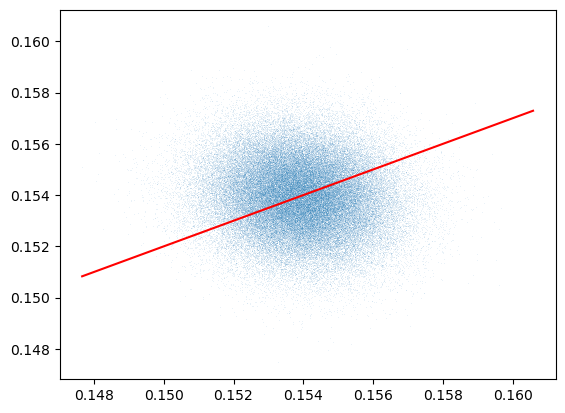

r2: -0.09782067279728426
Line Parameters: [0.49998408 0.07695022]


/Users/michellegarcia/miniconda3/envs/chem101_s24/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


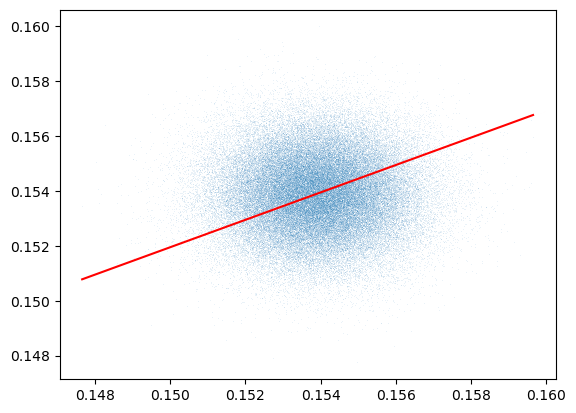

r2: 0.004681232649203516


In [23]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',s=0.1,linewidth=0.05)

#######SOLUTION###########

line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

<Figure size 640x480 with 0 Axes>

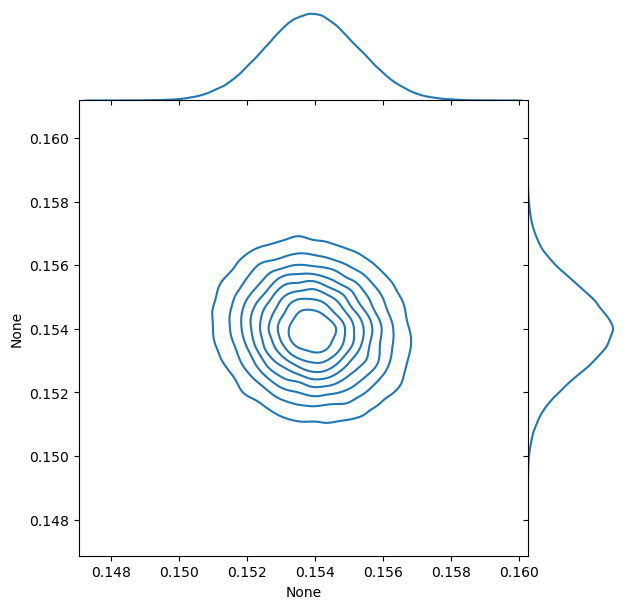

In [24]:
import seaborn as sns
plt.clf()
sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='kde',space=0,thresh=0)

<Figure size 640x480 with 0 Axes>

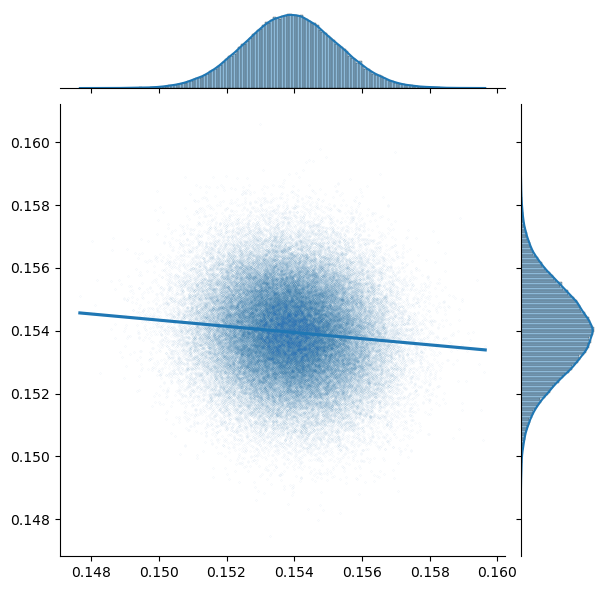

In [25]:
import seaborn as sns
plt.clf()
sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='reg',scatter_kws={'s':0.001})

**WEEK 1 Homework Question:  Why does one pair of these bonds appear slightly more correlated than the other?**

One pair of the bonds C1C2-C2C3 are slightly more correlated due to the shared carbon C2 in the bond length. There is a geometric constraint added. 

***Class Activity*** 

***Lets write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

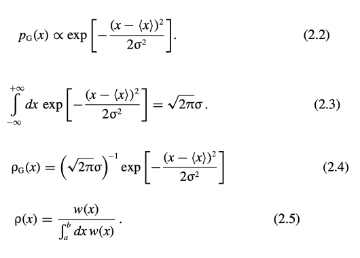
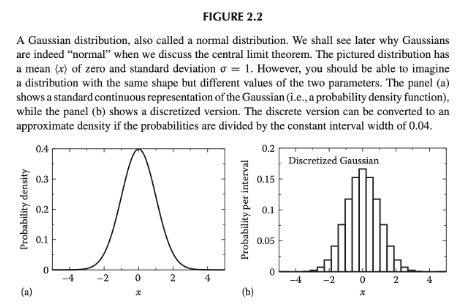

[    0     6    11    83   259  1017  2916  6479 11492 16466 18593 17153
 12480  7607  3602  1281   427   101    21     6] [0.147   0.14765 0.1483  0.14895 0.1496  0.15025 0.1509  0.15155 0.1522
 0.15285 0.1535  0.15415 0.1548  0.15545 0.1561  0.15675 0.1574  0.15805
 0.1587  0.15935 0.16   ]
a: 0.18690966963465752 x_0: 0.15389362703851528 fit_sigma: -0.0013888464033554044


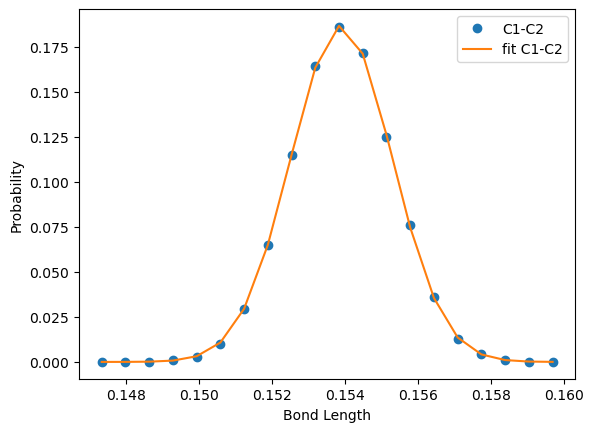

In [26]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

####SOLUTION####

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength,bins=20,range=[0.147,0.160])
print(counts,edges)
centers = edges[:-1] + np.diff(edges)/2
density=counts/(np.sum(counts))

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR HOMEWORK ####

###Now we define a gaussian function that we'll fit to our probability densities
def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]


C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers,density,'o',label='C1-C2')
plt.plot(centers,C1C2_fit,'-',label='fit C1-C2')
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)


***Homework Porblem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

a: 0.18690966963465752 x_0: 0.15389362703851528 fit_sigma: -0.0013888464033554044
a: 0.18617451614787534 x_0: 0.15395182595309592 fit_sigma: -0.0013933144836300719
a: 0.18772845010298828 x_0: 0.15390215378089472 fit_sigma: -0.001381788230026778


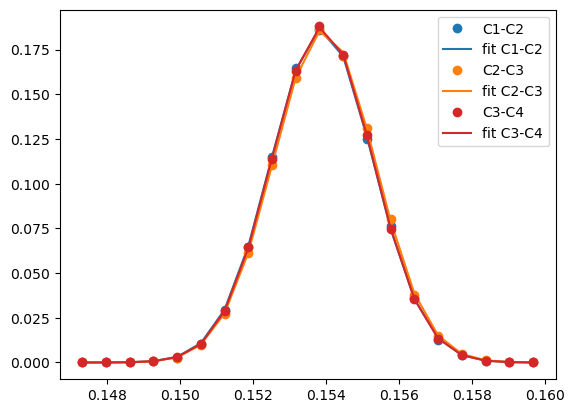

In [29]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####
def histogram_bincenters(bondlengths, n_bins, b_range):
    """
    bondlengths: (np.array) the md calculated lengths of bonds 
    bins: (int) the number of bins
    range: (list) the minimum and maximum  
    """

    counts, edges = np.histogram(bondlengths, bins=n_bins, range=b_range)
    centers= edges[:-1] + np.diff(edges)/2
    density= counts/(np.sum(counts))

    return centers, density

# #use function to iterate over all CC bonds, plot the desnities and the fits. 
# # [centers, density]
# centers, density = histogram_bincenters(bondlengths=C1C2bondlength, n_bins=20, b_range=[0.147,0.160])

# C1C2_fit, C1C2_fit_params = fit_gauss(centers, density)
# plt.plot(centers, density, "o", label="C1-C2")
# plt.plot(centers, C1C2_fit, "-", label="fit C1-C2")

bondlength_list = [C1C2bondlength, C2C3bondlength, C3C4bondlength]
labels = ["C1-C2", "C2-C3", "C3-C4"]
colors = ["tab:blue", "tab:orange", "tab:red"]
counter = 0
for bondlength in bondlength_list: 
    centers, density = histogram_bincenters(bondlength, 20, [0.147,0.160])
    
    # fit the gaussian 
    fit, fit_params = fit_gauss(centers, density)
    
    # plot the density 
    plot_label = labels[counter]
    plt.plot(centers, density, "o", label=plot_label, color = colors[counter])
    # plot the gaussian fit 
    plt.plot(centers, fit, "-", label="fit " + plot_label, color= colors[counter])
    
    counter += 1 

plt.legend()

**Week 1 Homework Problem #2: convert these probability distributions to culmulative distribution functions**

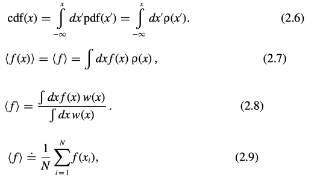

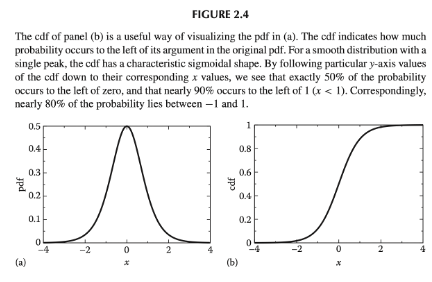

In [31]:
###WEEK 1 HOMEWORK#### 

####HOMEWORK SOLUTION####

#TRY THIS FUNCTION:
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

def cdf(density):
    cdf = np.cumsum(density)
    return cdf 

a: 0.18690966963465752 x_0: 0.15389362703851528 fit_sigma: -0.0013888464033554044
a: 0.18617451614787534 x_0: 0.15395182595309592 fit_sigma: -0.0013933144836300719
a: 0.18772845010298828 x_0: 0.15390215378089472 fit_sigma: -0.001381788230026778


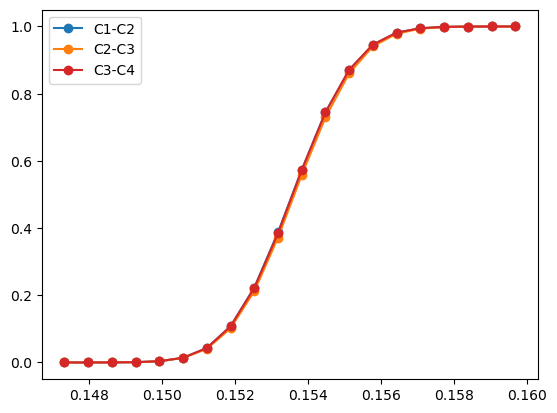

In [36]:

for n,bondlength in enumerate(bondlength_list): 
    centers, density = histogram_bincenters(bondlength, 20, [0.147,0.160])
    
    # fit the gaussian 
    fit, fit_params = fit_gauss(centers, density)
    
    # plot the cdf density for each bondlength
    plot_label = labels[n]
    plt.plot(centers, cdf(density), "o", linestyle="-", label=plot_label, color = colors[n])

plt.legend()


**WEEK 1 Homework Problem #3: Lets draw some random frames from our trajectory (for example 10,100,1000,10000),  calculate the probability distribution functions for 4 of these random samples, and fit  gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle.  Why is the Gaussian fit for a dihedral so poor with a large sample? ***


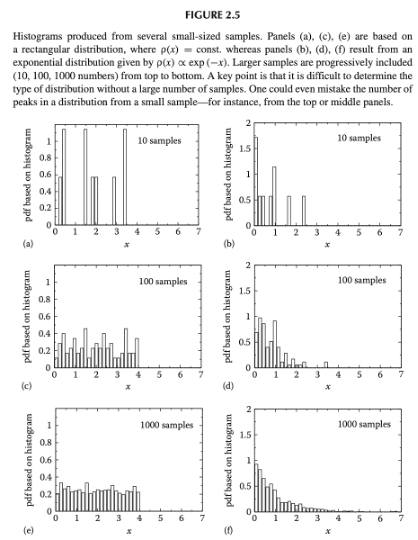

(array([2., 0., 1., 1., 2., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.1516135 , 0.1519395 , 0.1522655 , 0.1525915 , 0.1529175 ,
        0.1532435 , 0.1535695 , 0.1538955 , 0.1542215 , 0.1545475 ,
        0.15487349, 0.1551995 , 0.15552549, 0.1558515 , 0.15617749,
        0.1565035 , 0.15682949, 0.1571555 , 0.15748149, 0.1578075 ,
        0.15813349]),
 [<matplotlib.patches.Polygon at 0x282ab5b50>])

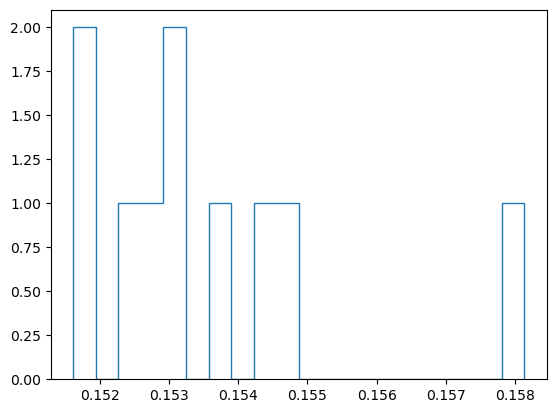

In [39]:
#ADD CODE FOR FITTING GUASSIAN FUNCTIONS TO RANDOM SAMPLES  HERE#
#Draw 10,100,1000 random samples of a bond angle - FIT THEM TO BOND ANGLE

#This function might be helpful:
rands=np.random.randint(100000, size=(10))
rands
C1C2bond=C1C2bondlength[:,0]
C1C2bond[rands]
plt.hist(C1C2bond[rands],bins=20,histtype='step')
#Draw 10,100,1000,10000 random samples of a dihedral angle - FIT THEM TO A GAUSSIAN - WHY IS THIS FIT SO POOR?


In [40]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their histograms.  Find a nice way to visualize the C-C-C-C dihedral angle 

(100000, 2)
[[1.878026  1.9487206]
 [1.957242  1.9392803]
 [1.9083318 1.9553038]
 ...
 [1.9964118 2.0549417]
 [1.9786837 1.9628704]
 [1.9736893 2.0265148]]


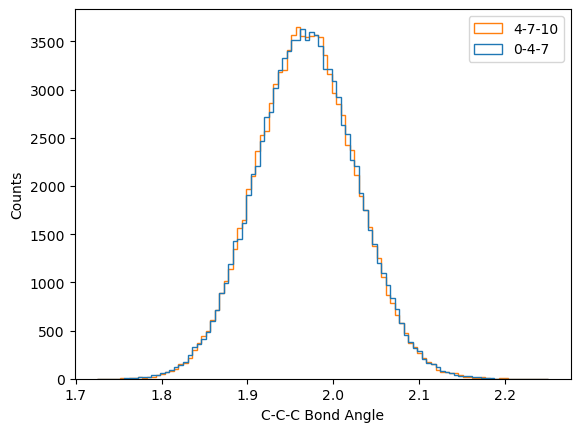

[[-3.0999045]
 [-3.1180506]
 [ 2.9106166]
 ...
 [ 3.0280972]
 [ 2.9176273]
 [-2.959322 ]]
[[-177.61143]
 [-178.65112]
 [ 166.76604]
 ...
 [ 173.49718]
 [ 167.16772]
 [-169.55666]]


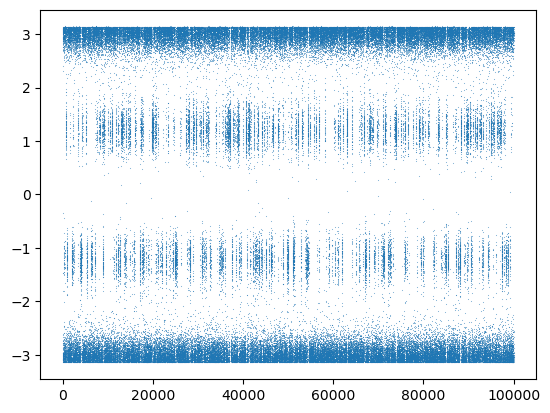

In [41]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

In [43]:
### Solution ###
def fit_gauss(x,y):
    """
    I updated this function to include a closer 
    initial guess. 
    """
    # Compute initial parameter guesses
    initial_guess_a = max(y)  # Initial guess for the peak height
    initial_guess_x0 = np.mean(x)  # Initial guess for the peak position
    initial_guess_sigma = np.std(x)  # Initial guess for the standard deviation

    # Define initial guesses as a tuple
    initial_guess = (initial_guess_a, initial_guess_x0, initial_guess_sigma)
    # Pass initial_guess to curve_fit function
    parameters, covariance = curve_fit(gauss, x, y, p0=initial_guess)
    
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:", fit_a, "x_0:", fit_x0, "fit_sigma:", fit_sigma)

    fit_y = gauss(x, fit_a,fit_x0, fit_sigma)

    return fit_y, [fit_a,fit_x0, fit_sigma]



a: 0.2787684426067527 x_0: 1.955405292386622 fit_sigma: 0.04112238859927152
a: 0.21696640202908668 x_0: 1.9626342183444698 fit_sigma: 0.04878327154604813
a: 0.17653083817312434 x_0: 1.967302230291744 fit_sigma: 0.060918434779875824
a: 0.18028218548191718 x_0: 1.9681564802679743 fit_sigma: 0.060203824009057605


(0.0, 0.4)

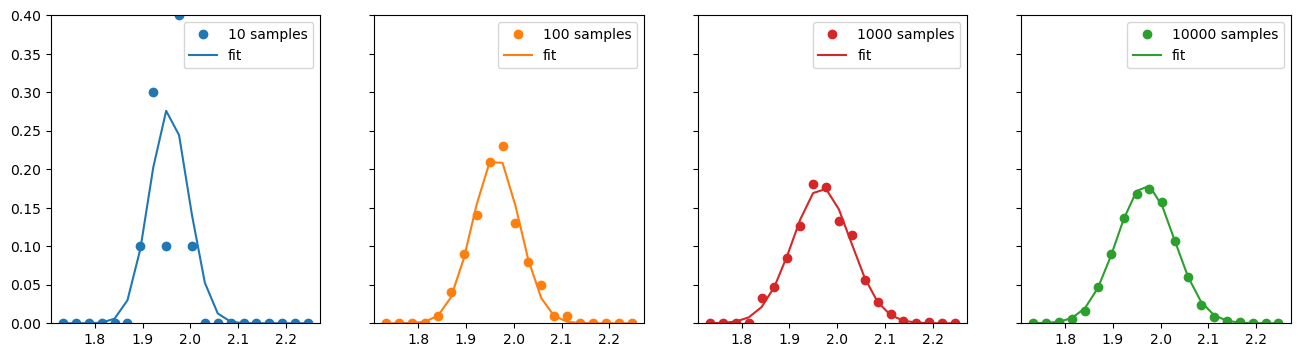

In [44]:
### Solution ### 
# try to plot for ang1 
sizes = [10, 100, 1000, 10000]
colors = ["tab:blue", "tab:orange", "tab:red", "tab:green"]
labels = [["10 samples","fit"], ["100 samples","fit"], ["1000 samples","fit"], ["10000 samples","fit"]]
# plots 
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for n,s in enumerate(sizes): 
    rands=np.random.randint(100000, size=s)
    centers, density = histogram_bincenters(ang1[rands], 20, [1.72,2.26]) 
    fit, fit_params = fit_gauss(centers, density)

    # plot 
    axs[n].plot(centers, density, "o", label= labels[n][0], color=colors[n])
    axs[n].plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    axs[n].legend()

plt.ylim(0,0.40)

a: 0.2962158904728322 x_0: 1.9832669343306373 fit_sigma: 0.03659232590176946
a: 0.18616403264109832 x_0: 1.955325683501399 fit_sigma: 0.05680273290192407
a: 0.19306876772066886 x_0: 1.9642276279258943 fit_sigma: 0.05571883337419465
a: 0.18843587580712381 x_0: 1.9666705080969704 fit_sigma: 0.05700391918156493


(0.0, 0.4)

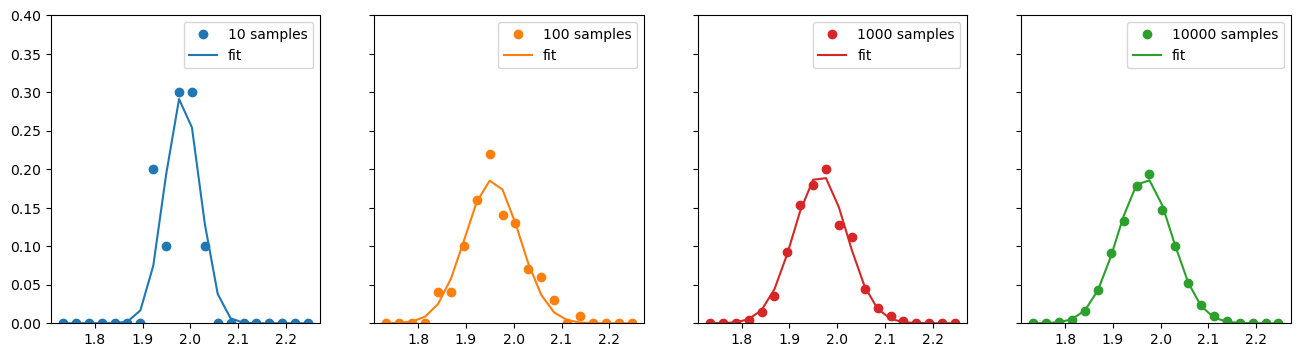

In [45]:
### Solution ###
# try to plot for ang2 
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for n,s in enumerate(sizes): 
    rands=np.random.randint(100000, size=s)
    centers, density = histogram_bincenters(ang2[rands], 20, [1.72,2.26]) 
    fit, fit_params = fit_gauss(centers, density)

    # plot 
    axs[n].plot(centers, density, "o", label= labels[n][0], color=colors[n])
    axs[n].plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    axs[n].legend()

plt.ylim(0,0.40)

a: 8.210917010917168 x_0: -3.277233793484405 fit_sigma: 0.12373168963010768
a: 16.0906878224196 x_0: -4.551210384870337 fit_sigma: -0.5703655391801662
a: 0.34372709316110145 x_0: 3.057862776131721 fit_sigma: -0.21916503817339314
a: 0.6921118885070272 x_0: 3.3943290676544002 fit_sigma: -0.3341261293578249


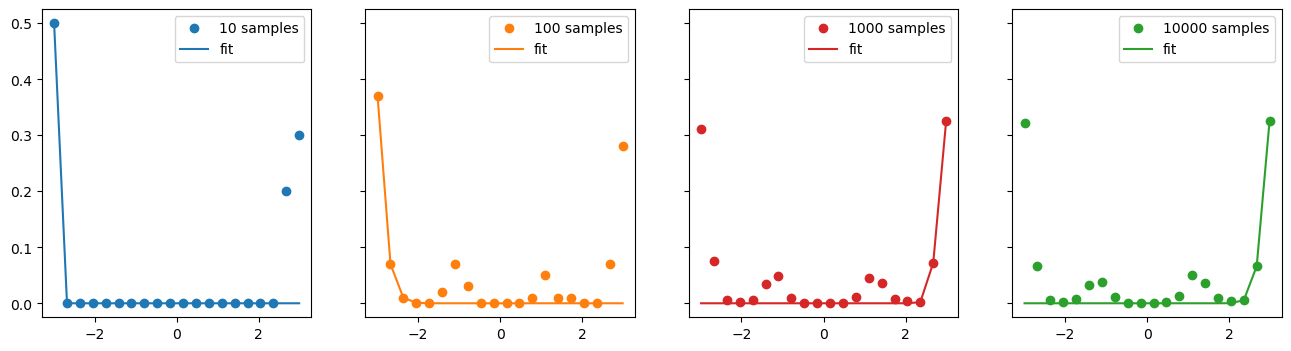

In [59]:
### Solution for Dihedral ###
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for n,s in enumerate(sizes): 

    rands=np.random.randint(100000, size=s)
    centers, density = histogram_bincenters(CCCC_torsion[:,0][rands], 20, [np.min(CCCC_torsion), np.max(CCCC_torsion)]) 
    fit, fit_params = fit_gauss(centers, density)

    # plot 
    axs[n].plot(centers, density, "o", label= labels[n][0], color=colors[n])
    axs[n].plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    axs[n].legend()


The dihedral distribution does not follow a guassian trend. It seems to be bimodal, but really, its cyclical in nature. The values might be gaussian if looking at the absolute value of a dihedral. Even then, it would be a bimodal graph due to the high amount of dihedrals present at pi (180°) and at + or - 60°

(0.0, 1000.0)

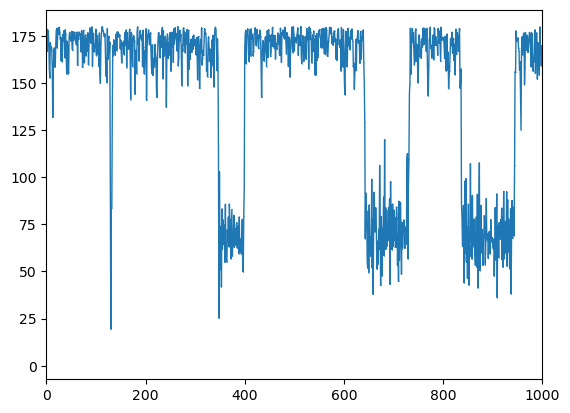

In [60]:
#print(np.where(CCCC_torsion<=0))
CCCC_tor_offset=np.rad2deg(CCCC_torsion)
#print(CCCC_tor_offset)
#for i in range(0,len(CCCC_tor_offset)):
#    if(CCCC_tor_offset[i]<0):
#        CCCC_tor_offset[i]+=360
        
plt.plot(np.abs(CCCC_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

***Week 1 Homework Question:  What is the probability of being found in the higher free energy C-C-C-C dihedral state?*****

In [61]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####

#### Calculate Here #####
#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe=CCCC_torsion[:,0]
a=np.where(CCCC_dihe<0)
print(a)
print(CCCC_dihe[a])

b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)

#Probability of being between 0 and -2 radians:
print(len(CCCC_dihe[c])/len(CCCC_dihe))


(array([    0,     1,     4, ..., 99994, 99996, 99999]),)
[-3.0999045 -3.1180506 -3.0957248 ... -2.5635333 -3.0604963 -2.959322 ]
(array([    2,     3,     6, ..., 99995, 99997, 99998]),)
(array([  129,   130,   131, ..., 99121, 99122, 99123]),)
0.09165


In [63]:
# the probability of being found in a high energy state

high_energy_state =np.where((CCCC_dihe<0.1) & (CCCC_dihe>-0.1))[0]
print("The probability of high energy state of synperiplanar is: ", len(high_energy_state)/len(CCCC_dihe))

The probability of high energy state of synperiplanar is:  7e-05


In [67]:
# the probability of being found in a high energy state
1.0472
eclipsed_energy_state =np.concatenate((np.where((CCCC_dihe<1.05) & (CCCC_dihe>1.04))[0], np.where((CCCC_dihe<-1.04) & (CCCC_dihe>-1.05))[0]))

print("The probability of energy state of eclipsed (+/-) is: ", len(eclipsed_energy_state)/len(CCCC_dihe))

The probability of energy state of eclipsed (+/-) is:  0.00231


**Class Activity: Are The Bond Angles and Dihedral Angle Correlated?**

r2: 0.007328547145631783


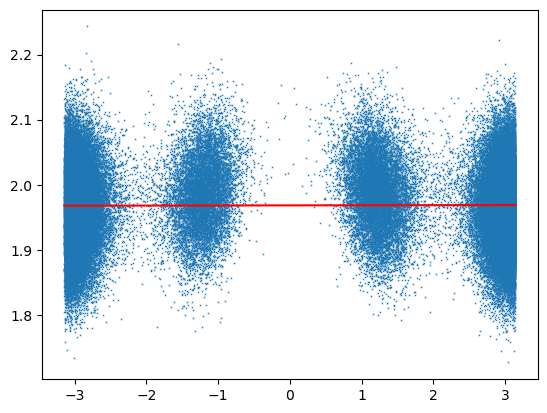

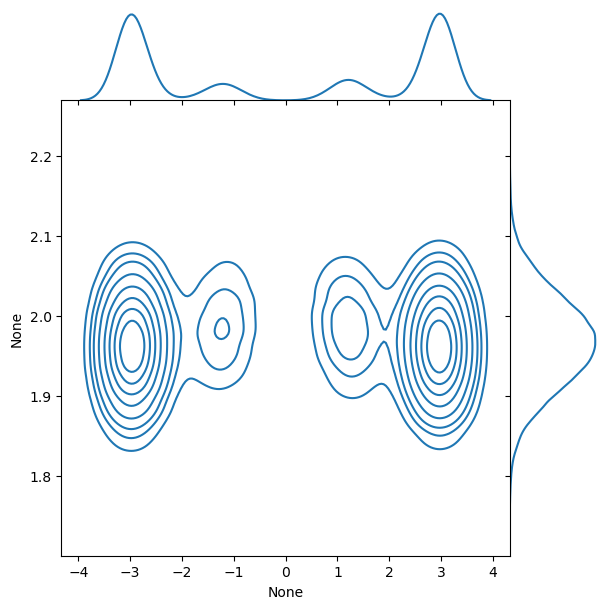

In [68]:
#### COMPLETE IN-CLASS ACTIVITY HERE #####
#Are the bond angle and dihedral correlated?
CCCC_dihe

plt.scatter(CCCC_dihe,ang1,marker='x',s=0.1)
r=np.corrcoef(CCCC_dihe,ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_dihe,ang1,1)
line_fit
x=np.linspace(min(CCCC_dihe),max(CCCC_dihe),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')
plt.show()
##### ADD FANCY SEABORN PLOT HERE ######
sns.jointplot(x=CCCC_dihe,y=ang1,kind='kde',space=0,thresh=0)

**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** 

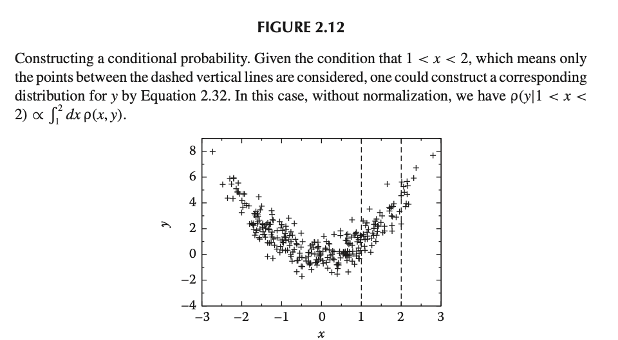

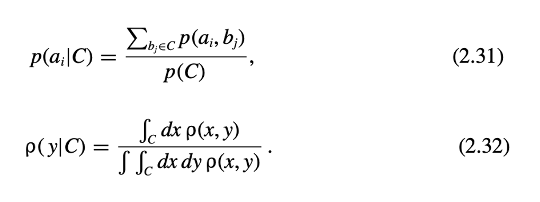

In [69]:
#Homework problem 3 Solution ##

#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe
a=np.where(CCCC_dihe<0)
print(a)
CCCC_dihe[a]
b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)
CCCC_dihe[c]

(array([    0,     1,     4, ..., 99994, 99996, 99999]),)
(array([    2,     3,     6, ..., 99995, 99997, 99998]),)
(array([  129,   130,   131, ..., 99121, 99122, 99123]),)


array([-1.796214  , -0.33899224, -1.4621035 , ..., -1.0964259 ,
       -1.3894364 , -0.97720754], dtype=float32)

In [70]:
#Will Walk through example of Autocorrelation Function (ACF) calculation here#
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)
    
print(ang1)
print(ang1[1:])
print(ang1[:-1])

[1.878026  1.957242  1.9083318 ... 1.9964118 1.9786837 1.9736893]
[1.957242  1.9083318 1.9151906 ... 1.9964118 1.9786837 1.9736893]
[1.878026  1.957242  1.9083318 ... 1.9823573 1.9964118 1.9786837]


**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


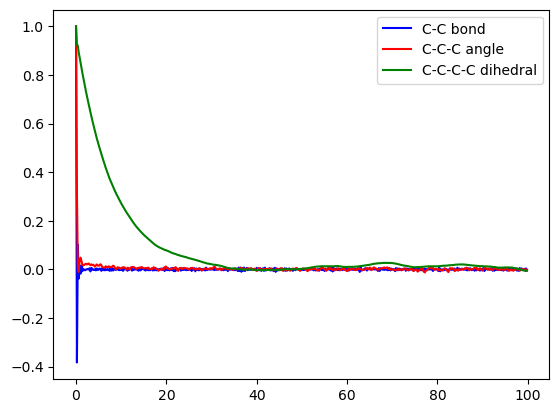

In [71]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

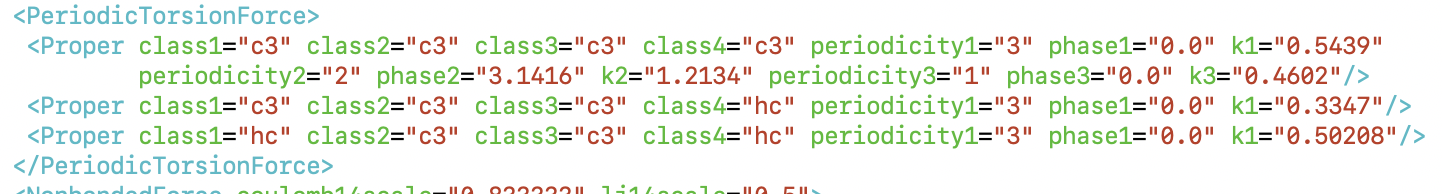

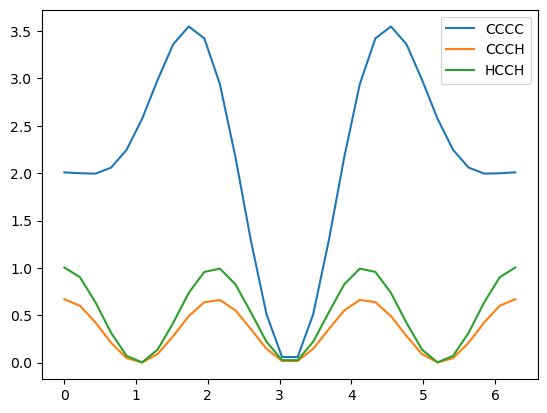

In [226]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e, label="CCCC")
plt.plot(rad_ang,CCCH_e, label="CCCH")
plt.plot(rad_ang,HCCH_e, label="HCCH")
plt.legend()

In [74]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

In [260]:
#Lets Consider Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]]
# CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]
CCCH_indices=[[10,7,4,5],[10,7,4,6],[7,4,0,3],[7,4,0,2],[7,4,0,1],[4,7,10,13],[4,7,10,12],[4,7,10,11], [0,4,7,8], [0,4,7,9]]


HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])


In [76]:
print(HCCH_indices)
print(HCCH_torsions)

[[8, 7, 4, 5], [8, 7, 4, 6], [9, 7, 4, 5], [9, 7, 4, 6], [6, 4, 0, 1], [6, 4, 0, 2], [6, 4, 0, 3], [5, 4, 0, 1], [5, 4, 0, 2], [5, 4, 0, 3], [13, 10, 7, 8], [12, 10, 7, 8], [11, 10, 7, 8], [13, 10, 7, 9], [12, 10, 7, 9], [11, 10, 7, 9]]
[[ 3.131104   -1.2131253   1.1701779  ... -0.94290614  1.2183026
  -2.9317744 ]
 [-2.911515   -0.91349924  1.2165704  ... -1.0202767   1.2007158
  -3.0514565 ]
 [ 2.7665088  -1.5007396   0.75565255 ... -1.1963683   1.0029502
   3.1344116 ]
 ...
 [ 3.043197   -1.0957026   1.0551325  ...  1.3728392  -2.815279
  -0.792478  ]
 [ 2.955407   -1.3379749   0.82605565 ...  1.1462121   3.0421765
  -1.0931276 ]
 [-2.8739588  -0.8429192   1.3920363  ...  1.1749375  -3.118405
  -1.0016418 ]]


**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

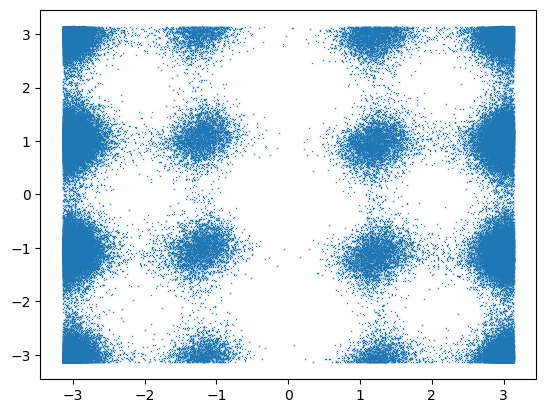

<Figure size 640x480 with 0 Axes>

In [261]:
####WEEK 1 Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Perhaps Consider CCCC vs. [8,7,4,5]



#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Perhaps Consider CCCC vs. [12,10,7,9]?

#For Example:
plt.scatter(CCCC_torsion,HCCH_torsions[:,14],marker='x',s=0.05)
plt.show()
plt.clf()


Line Parameters: [0.63507161 0.00360821]
r2: 0.6351265382363652


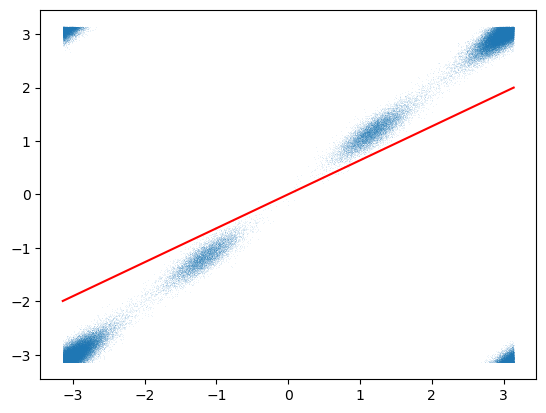

Line Parameters: [0.19379171 1.02241227]
r2: 0.1992628708600173


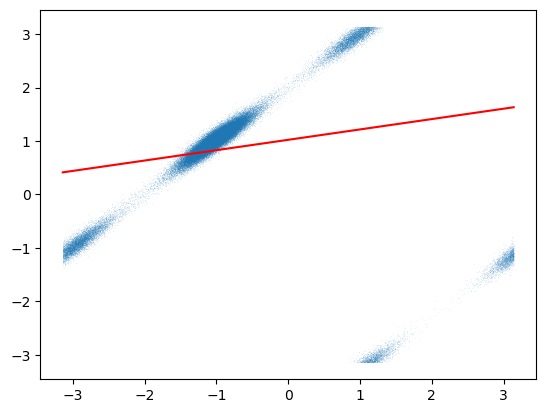

Line Parameters: [-0.10398166  0.85034345]
r2: -0.27593581520586064


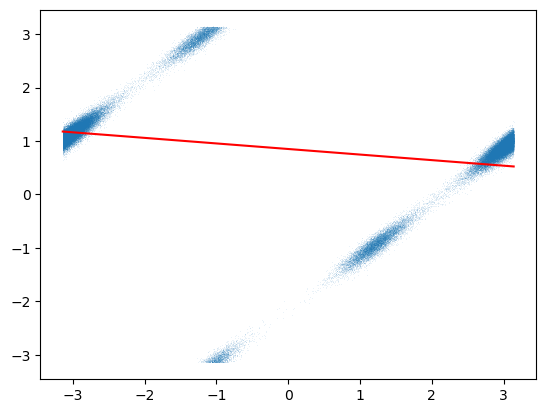

Line Parameters: [4.40537794e-05 2.35432638e-02]
r2: 4.4310442338225463e-05


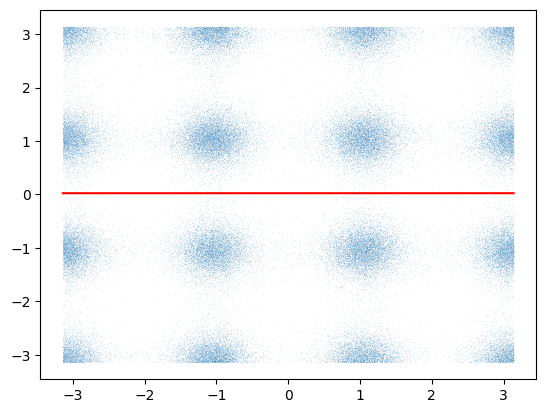

Line Parameters: [-0.13064576  0.10735922]


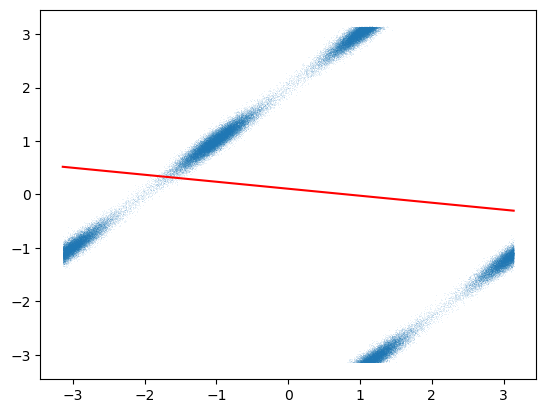

r2: -0.12738025855839974


In [269]:
### Solution ###

# highly correlated 
line_fit=np.polyfit(HCCH_torsions[:,0],HCCH_torsions[:,3],1)
x = np.linspace(min(HCCH_torsions[:,0]), max(HCCH_torsions[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')

r=np.corrcoef(HCCH_torsions[:,0],HCCH_torsions[:,3])
print("r2:",r[0,1])

plt.scatter(HCCH_torsions[:,0],HCCH_torsions[:,3],marker='x',s=0.1,linewidth=0.05)
plt.show()
plt.clf()

line_fit=np.polyfit(CCCH_torsions[:,9],CCCH_torsions[:,8],1)
x = np.linspace(min(CCCH_torsions[:,9]), max(CCCH_torsions[:,9]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')

r=np.corrcoef(CCCH_torsions[:,9],CCCH_torsions[:,8])
print("r2:",r[0,1])

plt.scatter(CCCH_torsions[:,9],CCCH_torsions[:,8],marker='x',s=0.1,linewidth=0.05)
plt.show()
plt.clf()

line_fit=np.polyfit(CCCC_torsion[:,0],CCCH_torsions[:,8],1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')

r=np.corrcoef(CCCC_torsion[:,0],CCCH_torsions[:,8])
print("r2:",r[0,1])

plt.scatter(CCCC_torsion[:,0],CCCH_torsions[:,8],marker='x',s=0.1,linewidth=0.05)
plt.show()
plt.clf()

# no correlation 
line_fit=np.polyfit(CCCH_torsions[:,3],CCCH_torsions[:,5],1)
x = np.linspace(min(CCCH_torsions[:,3]), max(CCCH_torsions[:,5]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')

r=np.corrcoef(CCCH_torsions[:,3], CCCH_torsions[:,5])
print("r2:",r[0,1])

plt.scatter(CCCH_torsions[:,3], CCCH_torsions[:,5],marker='x',s=0.1,linewidth=0.05)
plt.show()
plt.clf()

# this is a systematic offset 
# [12, 10, 7, 8], [12, 10, 7, 8, 9]
line_fit=np.polyfit(HCCH_torsions[:,11],HCCH_torsions[:,14],1)
x = np.linspace(min(np.concatenate((HCCH_torsions[:,11], HCCH_torsions[:,14]))), max(np.concatenate((HCCH_torsions[:,11], HCCH_torsions[:,14]))),20)
y = line_fit[0]*x+line_fit[1]

print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.scatter(HCCH_torsions[:,11], HCCH_torsions[:,14],marker='x',s=0.1,linewidth=0.05)

plt.show()

r=np.corrcoef(HCCH_torsions[:,11],HCCH_torsions[:,14])
print("r2:",r[0,1])


In [87]:
# np.concatenate(HCCH_torsions[:,11], HCCH_torsions[:,14])

HCCH_torsions[:,11]

array([-0.935764 , -0.9650067, -1.1019428, ...,  1.4044158,  1.0332047,
        1.1277914], dtype=float32)

**Homework Problem #6: SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT**

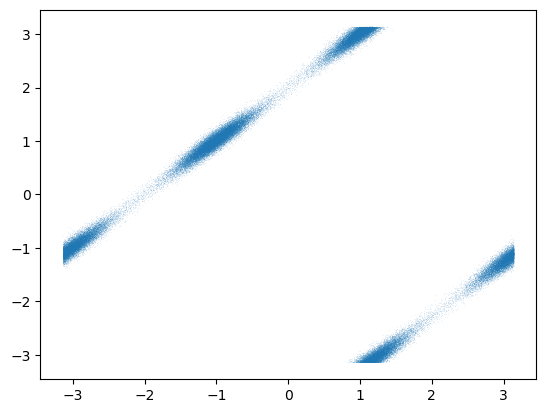

In [92]:
### Solution ###

#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT
# this is a systematic offset 
# [12, 10, 7, 8], [12, 10, 7, 8, 9]

plt.scatter(HCCH_torsions[:,11], HCCH_torsions[:,14],marker='x',s=0.1,linewidth=0.05)
plt.show()


Text(0.5, 0, 'frame')

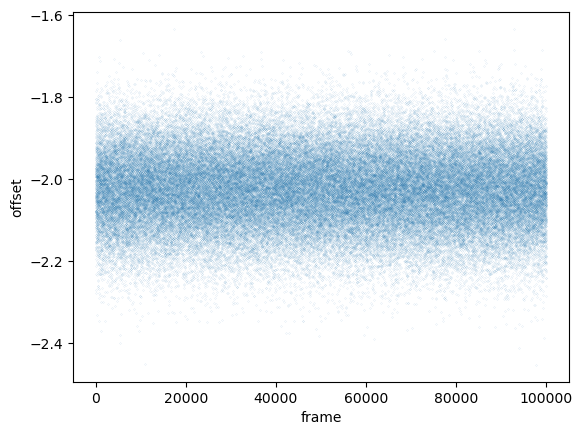

In [259]:
offset_diff = HCCH_torsions[:,11]- HCCH_torsions[:,14]
offset_diff = np.where(offset_diff>0, offset_diff - 2*np.pi, offset_diff)

plt.plot(offset_diff, marker=".",markersize=0.1, linestyle="None")
plt.ylabel("offset")
plt.xlabel("frame")

The systematic offset above makes sense due to the fact that the dihedrals have the same first 3 atoms, and the last hydrogens are on an sp3 carbon with only two hydrogens. I would expect the hydrogens to be offset by a tetrahedral 109.5° or 1.911 rad. It seems like the offset is always this. We see values about -1.91 and if we subtract 360 from the values above 3.14, we still get -1.91. This is the situation where the direction of the molecules flip. 

***WEEK 2 Homework Problem #1: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution***


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

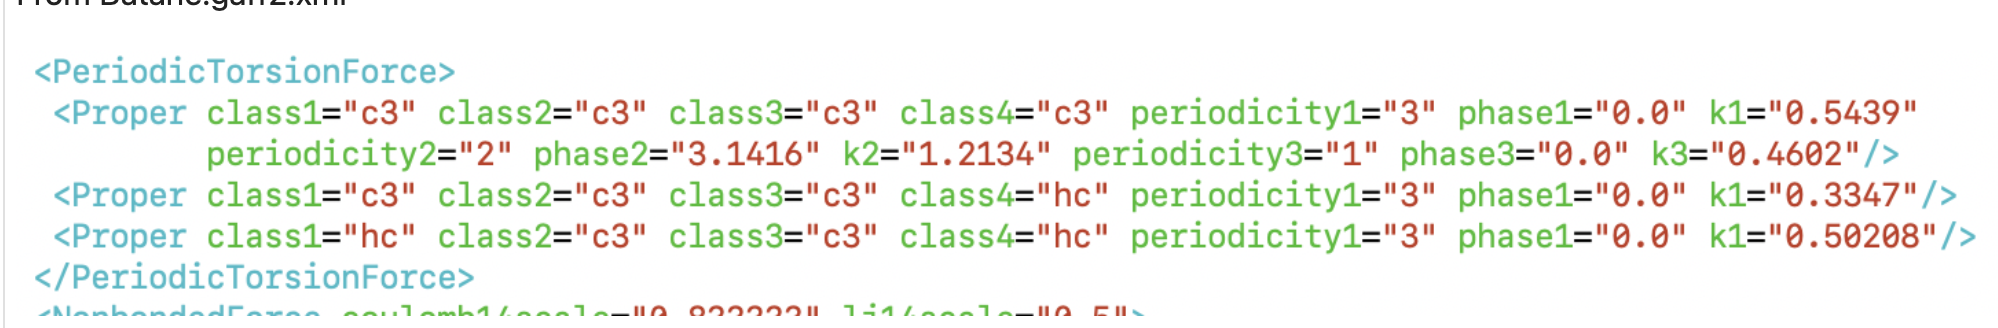

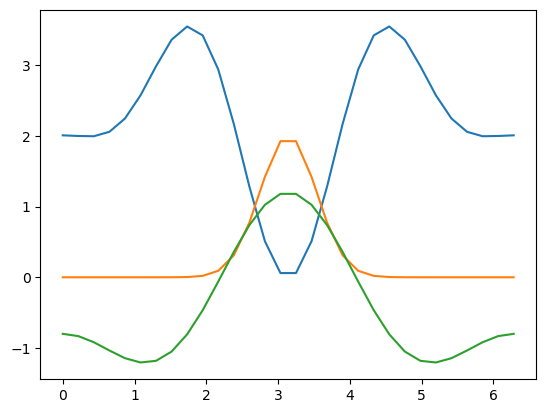

In [227]:
###SOLUTION#####

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

plt.plot(rad_ang,CCCC_e)

#We want to mimic a gaussian potential that adds potential energy when the CCCC diehdral = pi = 180 degrees
#We can think of this as approximating a guassian center at theta= 180
###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#Here is what we want our dihedral correction to look like:

gauss_cor = gauss(rad_ang, 2, np.pi, np.pi/8)
plt.plot(rad_ang,gauss_cor)

#Here I come up with a correction that should have the desired effect:

def TorsionCorrection(angle):
 e1=calc_torsion_energy(angle,-1,1,0)
 e2=calc_torsion_energy(angle,0.6,2,0)
 #e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2

torsion_cor=TorsionCorrection(rad_ang)

plt.plot(rad_ang,torsion_cor)

***WEEK 2 Homework Problem #2 Attempt to run a new MD Simulation with your modified torsion potential***

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [217]:
#RUN NEW MD SIMULATION HERE#
workdir="./Exercise0/"
datadir='./Exercise0/data/'
outdir='./Exercise0/outdir/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.corr1.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

./Exercise0/data/butane.pdb
./Exercise0/data/butane.gaff2.corr1.xml


In [218]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 6.997528691301373 kJ/mol
Potential energy after minimization is 6.495271673130703 kJ/mol


In [219]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,50.82591887506297,315.91270657765295
2000,28.150052656169247,290.8000113355277


In [220]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim_cor3.xtc"),100))
                
# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,45.56936604434955,353.9118662791098,0
500000,999.9999999901769,45.71971860763102,312.38590377999054,3.04e+04
750000,1499.9999999783536,56.17375337604618,279.05732436972977,3.08e+04
1000000,1999.9999999665301,38.11106299036226,245.62368158375568,3.06e+04
1250000,2499.9999999547067,27.877511855337822,461.56165008121883,3.04e+04
1500000,2999.9999999428833,31.804470191642608,334.13971210967236,3.06e+04
1750000,3499.99999993106,56.96171194206116,361.01000154482773,3.07e+04
2000000,3999.9999999192364,43.806665321824056,323.6431362797887,3.08e+04
2250000,4499.9999999992715,54.00458405521964,373.61052005677163,3.07e+04
2500000,5000.000000101135,43.86720650486311,370.6032158652606,3.08e+04
2750000,5500.000000202998,59.441642779724795,224.10715008793585,3.08e+04
3000000,6000.000000304862,43.03193278713136,298.33876805193916,3.08e+04
3250000,6500.000000406725,73.24472

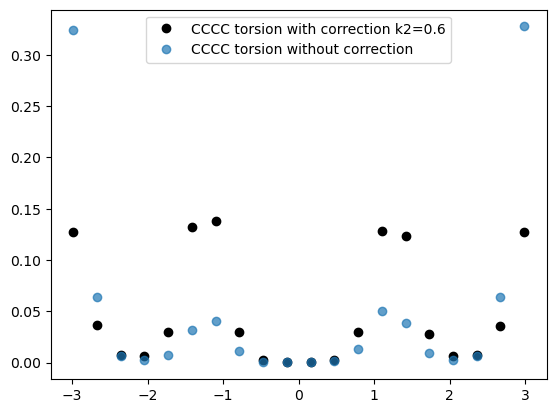

In [229]:
#Compare New Dihedral Distribution HERE)
# # k2 as 0.7
# traj_add_correction = md.load(os.path.join(workdir, "butane_sim_cor1.xtc"), top=PDB_file_name)
# CCCC_torsion_c=md.compute_dihedrals(traj_add_correction, [CCCC_index])
# centers, density = histogram_bincenters(CCCC_torsion_c[:,0], 20, [np.min(CCCC_torsion_c), np.max(CCCC_torsion_c)]) 
# plt.plot(centers, density, "o", label= "CCCC torsion with correction k2=0.7", color="tab:green")

# k2 as 0.6 
traj_add_correction = md.load(os.path.join(workdir, "butane_sim_cor3.xtc"), top=PDB_file_name)
CCCC_torsion_c=md.compute_dihedrals(traj_add_correction, [CCCC_index])
centers, density = histogram_bincenters(CCCC_torsion_c[:,0], 20, [np.min(CCCC_torsion_c), np.max(CCCC_torsion_c)]) 
plt.plot(centers, density, "o", label= "CCCC torsion with correction k2=0.6", color="black")

# # k2 as 0.5 
# traj_add_correction = md.load(os.path.join(workdir, "butane_sim_cor2.xtc"), top=PDB_file_name)
# CCCC_torsion_c=md.compute_dihedrals(traj_add_correction, [CCCC_index])
# centers, density = histogram_bincenters(CCCC_torsion_c[:,0], 20, [np.min(CCCC_torsion_c), np.max(CCCC_torsion_c)]) 
# plt.plot(centers, density, "o", label= "CCCC torsion with correction k2=0.5", color="tab:red")

traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
centers, density = histogram_bincenters(CCCC_torsion[:,0], 20, [np.min(CCCC_torsion), np.max(CCCC_torsion)]) 
plt.plot(centers, density, "o", label= "CCCC torsion without correction", color="tab:blue", alpha=0.7)

plt.legend()


**WEEK 2 Homework Problem #3 Plot the LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

#CHECK THE COMBINATION RULES USED FOR OPENMM##


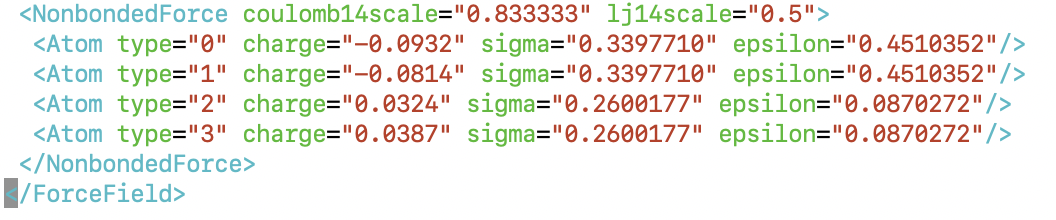




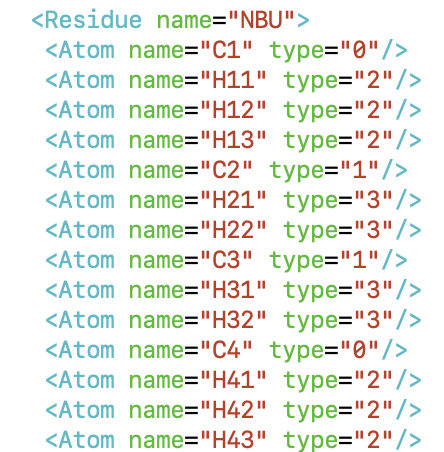

In [248]:
#Plot LJ and Couloumb Potentionals Here

# Define LJ and Coulomb functions
def lj(r, sigma, epsilon):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def coulomb(q1, q2, r, dielectric_constant=1.0):
    return (1.0 / (4 * np.pi * dielectric_constant)) * q1 * q2 / r

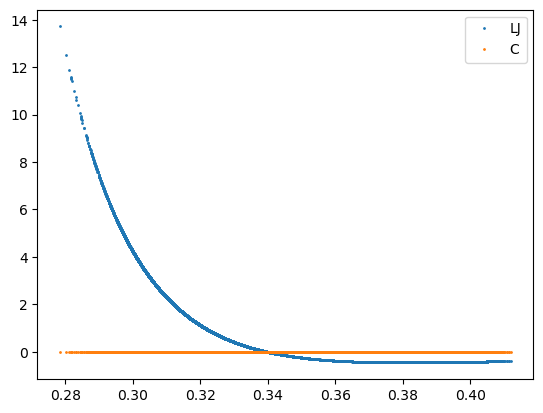

In [256]:
# different atom types exist
# end carbons are the same type [0,10], atomtypes [0,0]
# Compute distances between the specified pair of atoms
atom_pair = np.array([[0, 10]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

# Compute LJ and Coulomb potentials
sigma_value = 0.3397710  # Replace with your sigma value
epsilon_value = 0.4510352  # Replace with your epsilon value
q1 = -0.0932 # Charge of the first atom
q2 = -0.0932  # Charge of the second atom

lj_potentials = lj(distances, sigma_value, epsilon_value)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="C")

# centers, density = histogram_bincenters(lj_potentials, 20, [np.min(lj_potentials), np.max(lj_potentials)]) 
# plt.plot(centers, density, "o", label= "LJ")

# centers, density = histogram_bincenters(coulomb_potentials, 20, [np.min(coulomb_potentials), np.max(coulomb_potentials)]) 
# plt.plot(centers, density, "o", label= "C")

plt.legend()

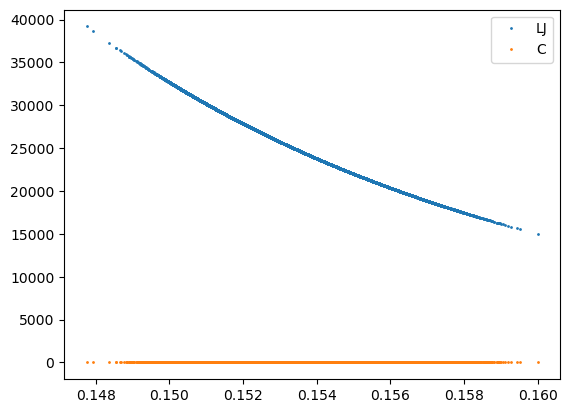

In [257]:
# side-by-side carbons [7,10], atomtypes [1,0]
atom_pair = np.array([[7, 10]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

# Compute LJ and Coulomb potentials
sigma_value = 0.3397710  # Replace with your sigma value
epsilon_value = 0.4510352  # Replace with your epsilon value
q1 = -0.0814 # Charge of the first atom
q2 = -0.0932  # Charge of the second atom

lj_potentials = lj(distances, sigma_value, epsilon_value)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="C")
plt.legend()


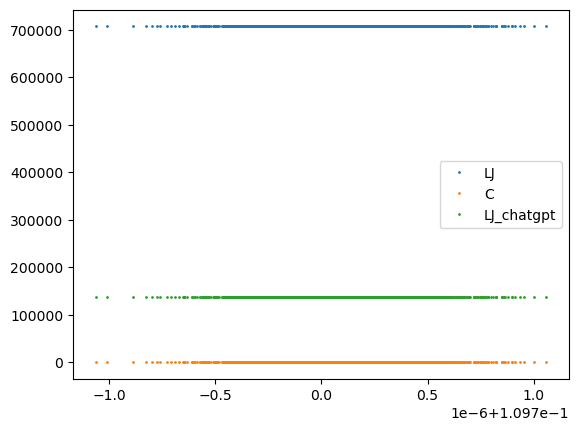

In [258]:
# side-by-side hydrogen with carbon [10, 11] atomtypes [0,2]
atom_pair = np.array([[10, 11]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

def lj3(r, sigma1, epsilon1, sigma2, epsilon2):
    return 4 * np.sqrt(epsilon1 * epsilon2) * ((sigma1 + sigma2) / (2 * r))**12 - ((sigma1 + sigma2) / (2 * r))**6

def lj2(r, sigma1, epsilon1, sigma2, epsilon2):
    return (lj(r, sigma1, epsilon1) + lj(r, sigma2, epsilon2))/ 2

# Define atom indices and their sigma and epsilon values
sigma_i = 0.3397710  # Sigma value for the first atom
epsilon_i = 0.4510352  # Epsilon value for the first atom
sigma_j = 0.2600177 # Sigma value for the second atom
epsilon_j = 0.0870272  # Epsilon value for the second atom

lj_potentials = lj2(distances, sigma_i, epsilon_i, sigma_j, epsilon_j)
lj_potentials_2 = lj3(distances, sigma_i, epsilon_i, sigma_j, epsilon_j)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="C")
plt.plot(distances, lj_potentials_2, linestyle="None", marker="o", markersize=1.0, label="LJ_chatgpt")
plt.legend()

# not sure how to add the lennard-jones potentials together. 
